<a href="https://colab.research.google.com/github/ameympatil/DSMP/blob/main/sesssion_22_date_and_time_in_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd

### Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

### Creating Timestamp objects

In [31]:
# creating a timestamp
type(pd.Timestamp('2023/1/5'))

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
# variations
pd.Timestamp('2023-1-5')
pd.Timestamp('2023, 1, 5')

Timestamp('2023-01-05 00:00:00')

In [33]:
# only year
pd.Timestamp('2023')

Timestamp('2023-01-01 00:00:00')

In [34]:
# using text
pd.Timestamp('5th January 2023')

Timestamp('2023-01-05 00:00:00')

In [35]:
# providing time also
pd.Timestamp('5th January 2023 9:21AM')
# pd.Timestamp('2023/1/5/9/21')

Timestamp('2023-01-05 09:21:00')

In [36]:
# AM and PM

In [37]:
# using datetime.datetime object
import datetime as dt

x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x

Timestamp('2023-01-05 09:21:56')

In [38]:
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

56

In [39]:
# why separate objects to handle data and time when python already has datetime functionality?

- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [40]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [41]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

In [42]:
# from strings
type(pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1']))

pandas.core.indexes.datetimes.DatetimeIndex

In [43]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [44]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

In [45]:
# using datatimeindex as series index
pd.Series([1,2,3],index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

### date_range function



In [63]:
# generate daily dates in a given range
pd.date_range(start='2023/1/5',end='2023/1/31',freq='D')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [64]:
# alternate days in a given range
pd.date_range(start='2023/1/5',end='2023/1/31',freq='2D')

DatetimeIndex(['2023-01-05', '2023-01-07', '2023-01-09', '2023-01-11',
               '2023-01-13', '2023-01-15', '2023-01-17', '2023-01-19',
               '2023-01-21', '2023-01-23', '2023-01-25', '2023-01-27',
               '2023-01-29', '2023-01-31'],
              dtype='datetime64[ns]', freq='2D')

In [65]:
# B -> business days
pd.date_range(start='2023/1/5',end='2023/1/31',freq='B')

DatetimeIndex(['2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='B')

In [66]:
# W -> one week per day
pd.date_range(start='2023/1/5',end='2023/1/31',freq='W-THU')

DatetimeIndex(['2023-01-05', '2023-01-12', '2023-01-19', '2023-01-26'], dtype='datetime64[ns]', freq='W-THU')

In [69]:
# H -> Hourly data(factor)
pd.date_range(start='2023/1/5',end='2023/2/28',freq='12H')

DatetimeIndex(['2023-01-05 00:00:00', '2023-01-05 12:00:00',
               '2023-01-06 00:00:00', '2023-01-06 12:00:00',
               '2023-01-07 00:00:00', '2023-01-07 12:00:00',
               '2023-01-08 00:00:00', '2023-01-08 12:00:00',
               '2023-01-09 00:00:00', '2023-01-09 12:00:00',
               ...
               '2023-02-23 12:00:00', '2023-02-24 00:00:00',
               '2023-02-24 12:00:00', '2023-02-25 00:00:00',
               '2023-02-25 12:00:00', '2023-02-26 00:00:00',
               '2023-02-26 12:00:00', '2023-02-27 00:00:00',
               '2023-02-27 12:00:00', '2023-02-28 00:00:00'],
              dtype='datetime64[ns]', length=109, freq='12H')

In [70]:
# M -> Month end
pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28'], dtype='datetime64[ns]', freq='M')

In [71]:
# MS -> Month start
pd.date_range(start='2023/1/5',end='2023/2/28',freq='MS')

DatetimeIndex(['2023-02-01'], dtype='datetime64[ns]', freq='MS')

In [72]:
# A -> Year end
pd.date_range(start='2023/1/5',end='2030/2/28',freq='A')

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31', '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [73]:
# using periods(number of results)
pd.date_range(start='2023/1/5',periods=25,freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31'],
              dtype='datetime64[ns]', freq='M')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [78]:
# simple series example

s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
s.str.split('/').str.get(0)
pd.to_datetime(s).dt.year

0    2023
1    2022
2    2021
dtype: int64

In [80]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.year

0    2023.0
1    2022.0
2       NaN
dtype: float64

In [81]:
df = pd.read_csv('/content/expense_data.csv')
df.shape

(277, 11)

In [82]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [83]:
df['Date'] = pd.to_datetime(df['Date'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


### dt accessor

Accessor object for datetimelike properties of the Series values.

In [98]:
df['day_name'] = df['Date'].dt.day_name()

In [99]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


In [104]:
df['month_name'] = df['Date'].dt.month_name()

<BarContainer object of 277 artists>

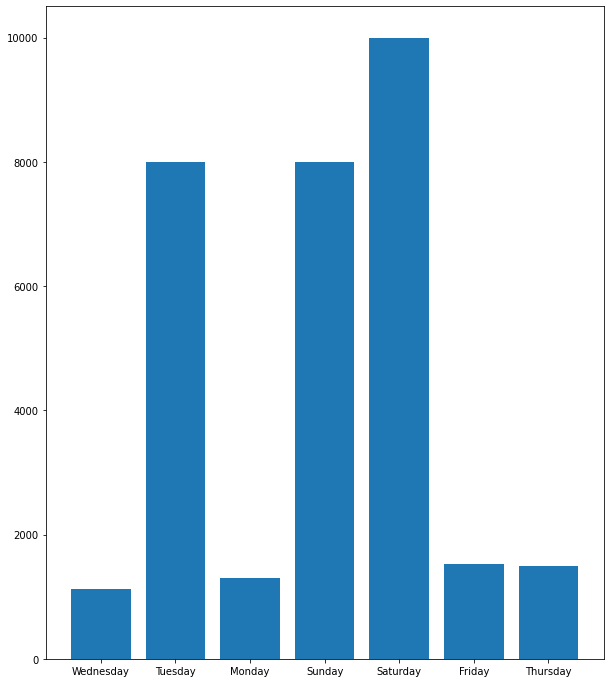

In [102]:
# plot graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
plt.bar(df['day_name'],df['INR'])

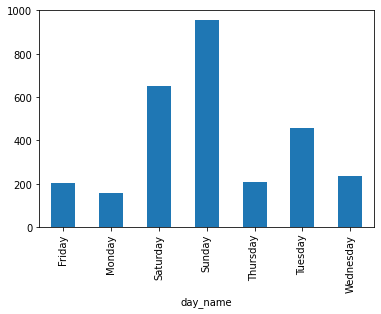

In [107]:
# day wise bar chart/month wise bar chart
df.groupby('day_name')['INR'].mean().plot(kind='bar')

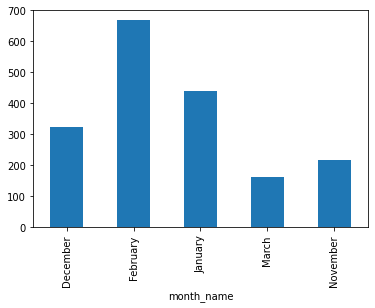

In [106]:
# day wise bar chart/month wise bar chart
df.groupby('month_name')['INR'].mean().plot(kind='bar')